# Connecting to a MongoDB Database with _pymongo_

In this session we will setup a MongoDB database using the SaaS (Software-as-a-Service ... i.e. a cloud/no-install version of the software) solution Atlas. To start, navigate to [https://www.mongodb.com/atlas](https://www.mongodb.com/atlas) and click on the "Try Free" button in the top right corner:
<br><br>
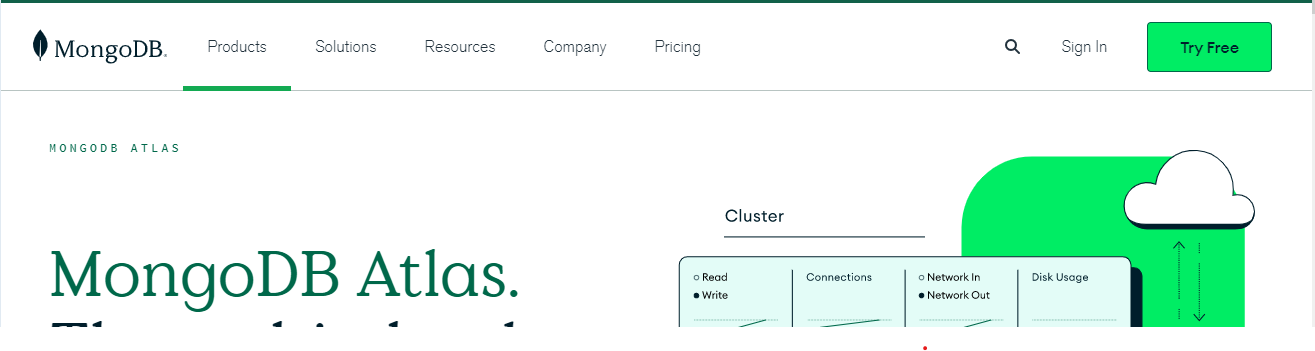
<br>

After you register in the usual fashion (use your University of Warwick email address) then you will be taken to the database setup page. Click the green "Build a Database" button in the centre of the page:
<br><br>
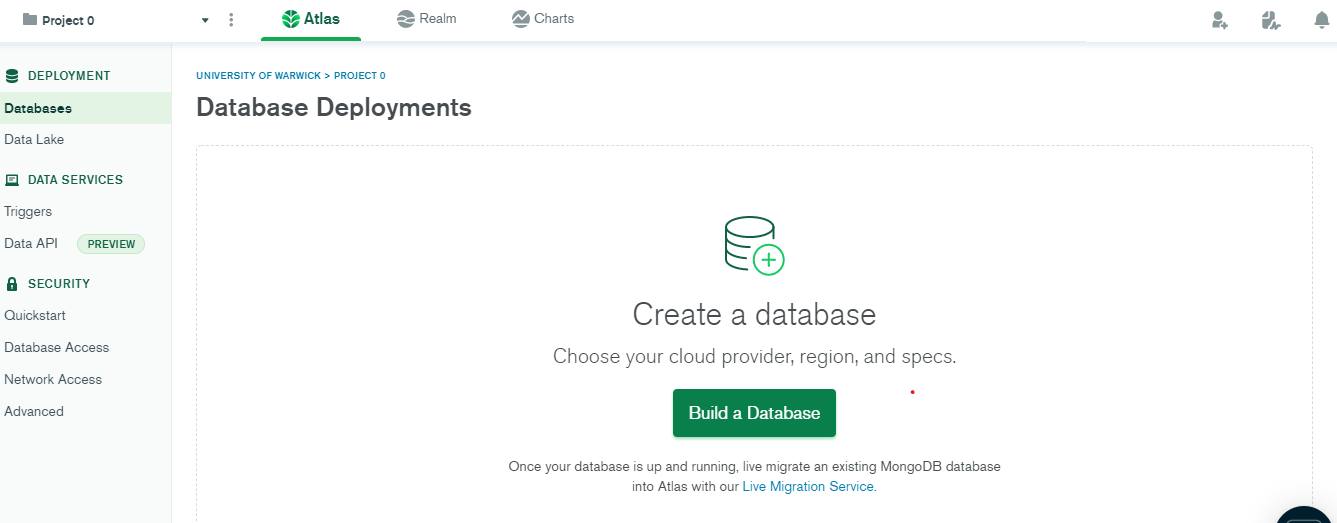
<br>

You will need to select the "FREE"/"Shared" option (far right):
<br><br>
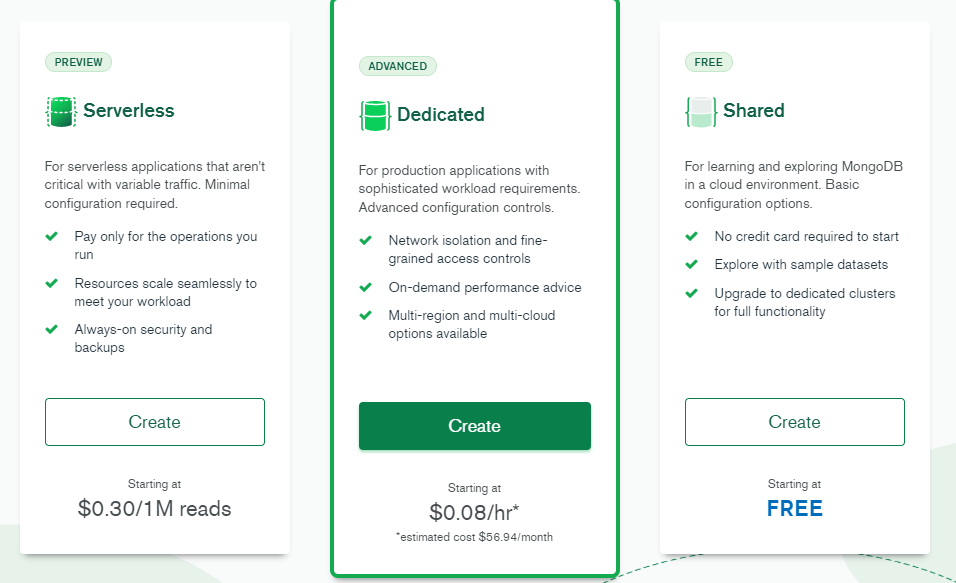
<br>

We then have various options to configure our database cluster. To begin with select AWS (Amazon Web Services) and their Ireland datacentre (eu-west-1): 
<br><br>
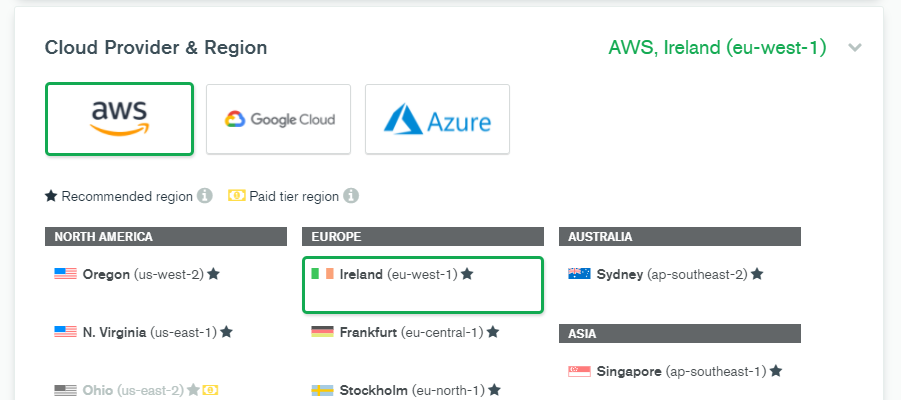
<br>

Keep all the other default settings the same (so that it remains free) and click the green "Create Cluster" button in the bottom right corner:
<br><br>
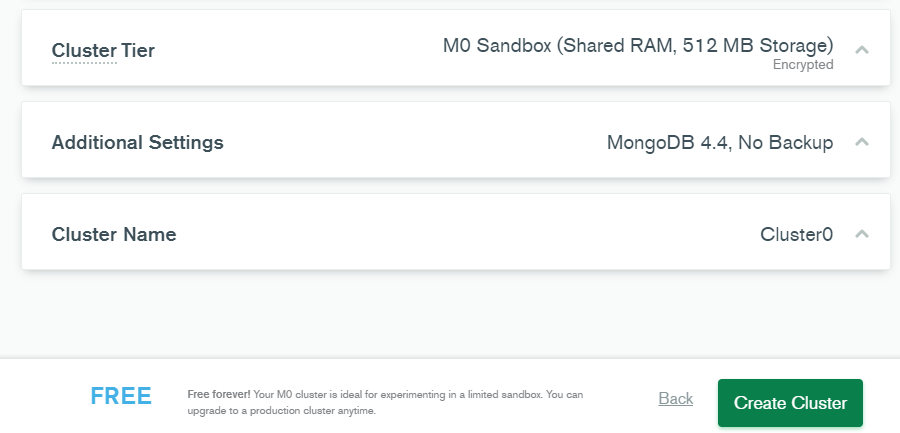
<br>

Now the cluster will start it's initialisation. While we wait there are some further elements to setup. First we will create a database "user". Enter a username and suitable password and then click "Create User" (in green again):
<br><br>
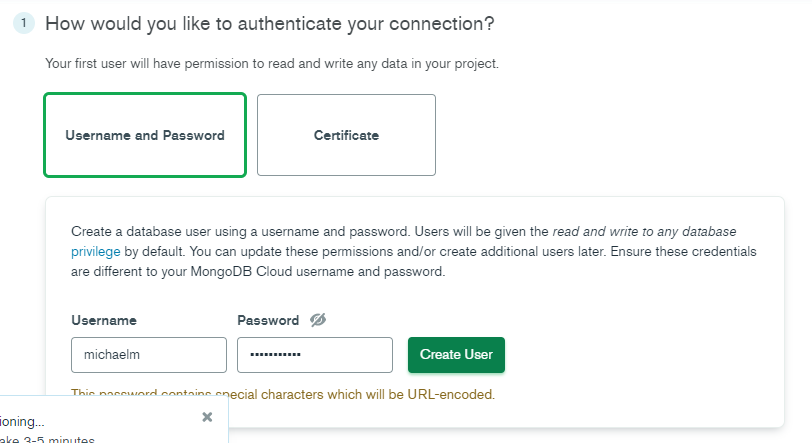
<br>
You can add additional users if you need to (e.g. for the IMA - although a shared user is also fine in this demo settng). 

Next we will allow access to the cluster by [IP address](https://en.wikipedia.org/wiki/IP_address). In the real-world, we want to limit this access to one or a few known IP addresses (e.g. an office or developer). However, as we are just messing around we will allow access from anywhere. The IP '0.0.0.0/0' does exactly this - allows any IP to access:
<br><br>
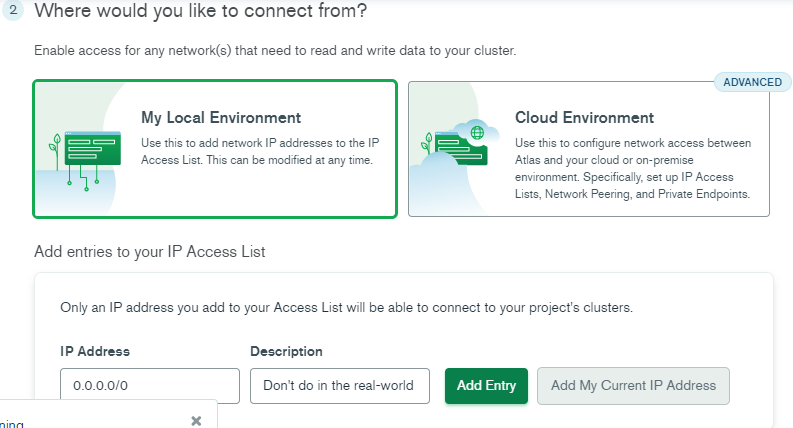
<br>
Afterwards, click the "Add Entry" button (in green).

We are now complete. Click on "Finish and Close" (you guessed it, in green), and the green button on the "congratulations" pop-up/modal that follows, and you should be navigated to the "Database Deployments" page, which should look something like this:
<br><br>
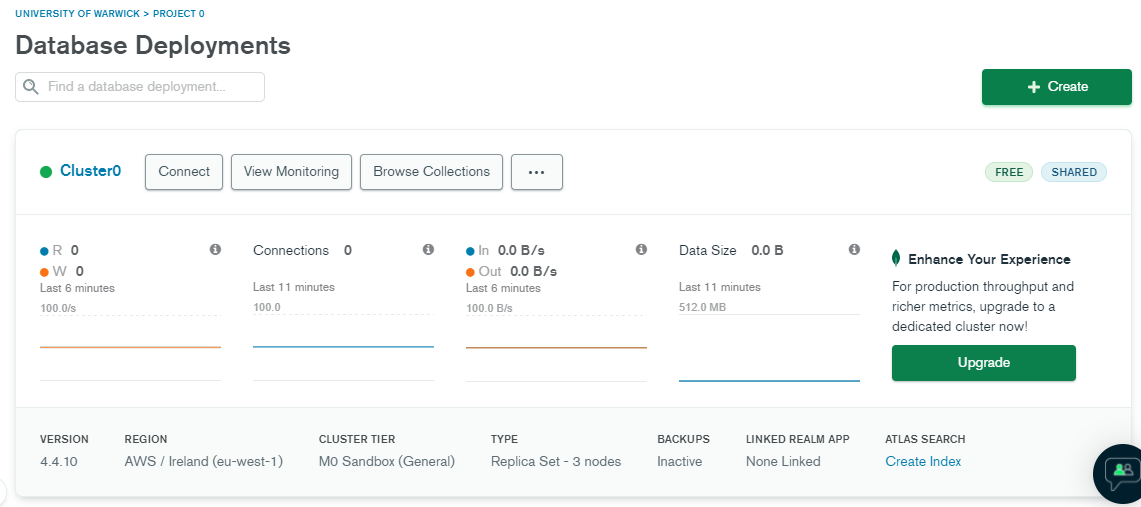
<br>
As you can see, we have setup a three-node cluster database that is ready to use!

## Connecting from Python
We will now connect to our database using the _pymongo_ package in Python. Start by installing the package (if required) and restart your kernel:

In [1]:
!pip install pymongo

To connect to the database we need to get the "connection string" from the Atlas GUI. Click on "Connect" on the "Database Deployments" page (above). This presents a pop-up/modal with three options, we want "Connect your application":
<br><br>
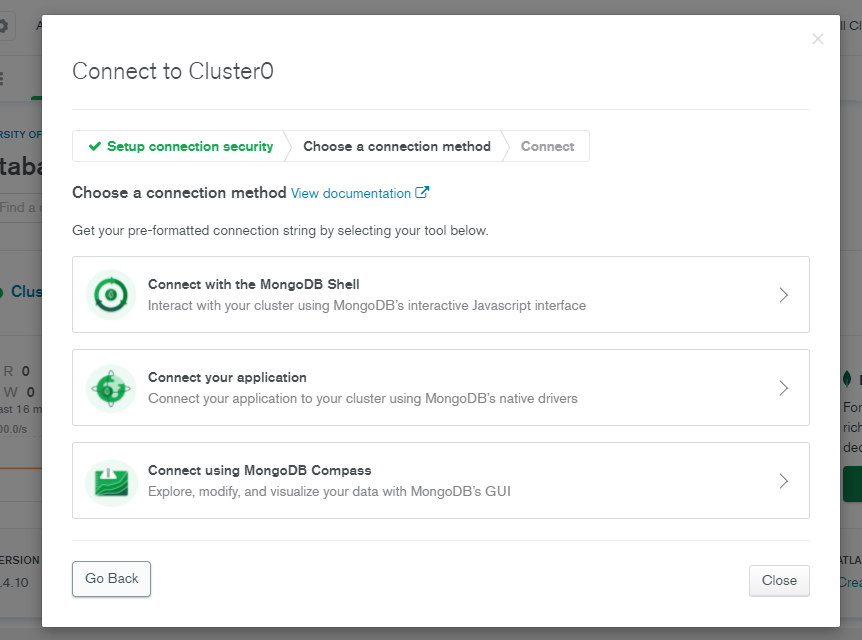
<br>

We will need to tell MongoDB we will be using Python - so select this from the dropdown menu. We also need a version. It is very likely if you are using Notebooks it is "3.6 or later" that we need, but it's sensible to check. The following code will do it:

In [2]:
import sys
sys.version

'3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]'

3.8 is greater than 3.6 and less than 3.11 so "3.6 or later" is the correct choice.
<br>
The page generates a connection path. We can go ahead and copy that before clicking "Close" in the bottom right corner:
<br><br>
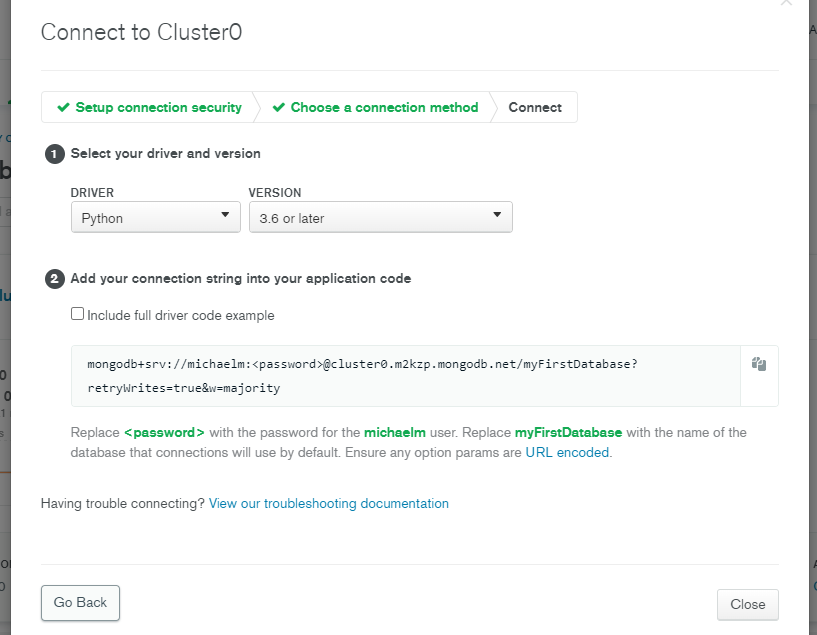
<br>

We will setup this string as a variable in Python so that we can use it to connect to our database. However, we will need to change a few things as per the message:

In [3]:
# copy and paste version
con_str = "mongodb+srv://michaelm:<password>@cluster0.m2kzp.mongodb.net/myFirstDatabase?retryWrites=true&w=majority"

# password version
con_str = "mongodb+srv://michaelm:B!gD@t@T3(h@cluster0.m2kzp.mongodb.net/myFirstDatabase?retryWrites=true&w=majority"

In summary, I have added the password I used ... "B!gD@t@T3(h". Note, this is again (like our use of "0.0.0.0/0") not a good practice. In production/real-world settings we would not want to hardcode our password anywhere, particularly in code we are putting on Github for anyone to see. Modern practices are to use environment variables, which is something we will cover in a later module.

We also need to set a default database, but we currently don't have one! Fortunately MongoDB allows us to play around with some sample databases and collections (basically MongoDB for "tables"). Click on the "..." button to get the following option:
<br><br>
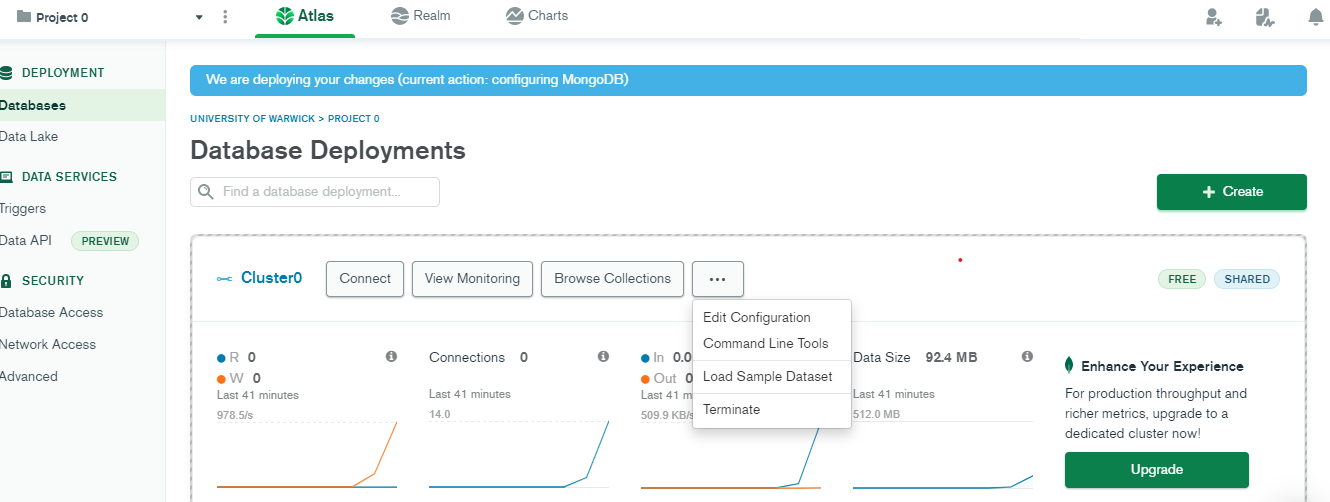
<br>
From here select "Load Sample Dataset". This may take a short while - coffee time.

Once complete we can navigate to "Browse Collections" and we should see something like this:
<br><br>
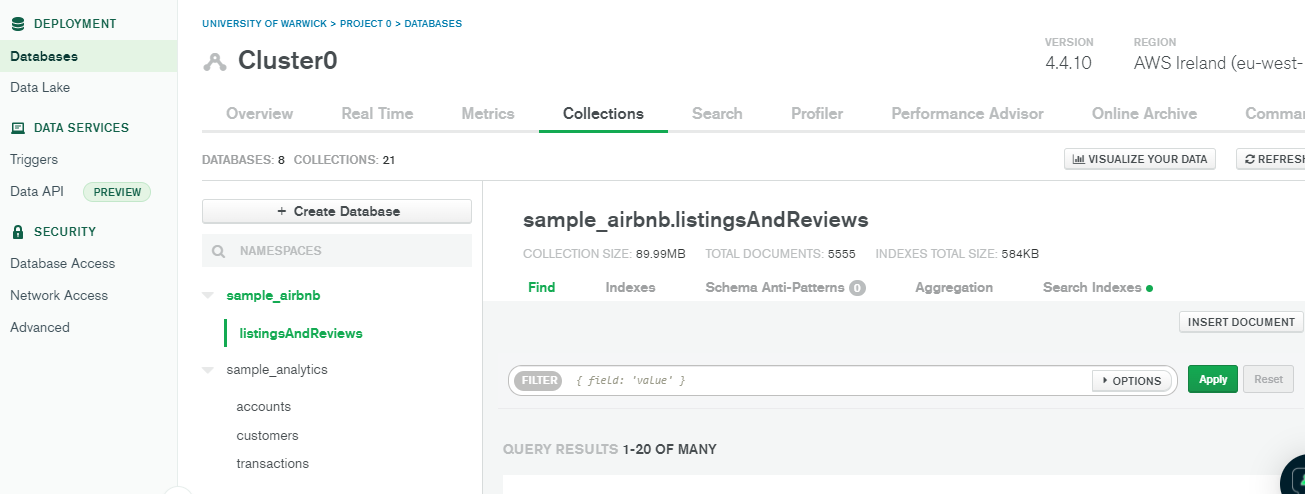
<br>
You will likely have several databases and collections. In my case MongoDB has installed 8 databases with 21 collections. As per the screenshot, the first database ("sample_airbnb") has one collection ("listingsAndReviews") while the second ("sample_analytics") has three. We will use the "sample_analytics" database as our default so I will update the connection string as follows:

In [4]:
# p + db version
con_str = "mongodb+srv://michaelm:B!gD@t@T3(h@cluster0.m2kzp.mongodb.net/sample_analytics?retryWrites=true&w=majority"

With all this in place we can now connect to our cloud instance. This is done via _MongoClient:_

In [5]:
from pymongo import MongoClient

client = MongoClient(con_str)

InvalidURI: Username and password must be escaped according to RFC 3986, use urllib.parse.quote_plus

Error! Trying to be cute with the password has meant I am using a character that has a different meaning in a URL ("@"). You may also have similar problems with other characters such as slashes and punctuation. As the error suggests we can use _urllib_ to fix this (via encoding):

In [6]:
import urllib

# final version
con_str = "mongodb+srv://michaelm:" + urllib.parse.quote_plus("B!gD@t@T3(h") + "@cluster0.m2kzp.mongodb.net/sample_analytics?retryWrites=true&w=majority"

client = MongoClient(con_str)

C:\Users\u4033\anaconda3\lib\site-packages\OpenSSL\crypto.py:1099: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  cert._x509 = crypto_cert._x509


_Note you may hit an SSL error with a message such as "TypeError: load_pem_private_key() missing 1 required positional argument: 'backend'". The below code should fix it (remember to delete the "#" and to restart the kernel after). You can ignore the pink "DepreciationWarning" as this wont stop the code runnin._

In [7]:
#!pip install --upgrade pyjwt[crypto]

Let's test everything has worked by connecting to one of our collections:

In [8]:
db = client.sample_analytics # database
collection = db.customers # select the customers collection

collection.find_one()

C:\Users\u4033\anaconda3\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:14: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  warnings.warn(


{'_id': ObjectId('5ca4bbcea2dd94ee58162a68'),
 'username': 'fmiller',
 'name': 'Elizabeth Ray',
 'address': '9286 Bethany Glens\nVasqueztown, CO 22939',
 'birthdate': datetime.datetime(1977, 3, 2, 2, 20, 31),
 'email': 'arroyocolton@gmail.com',
 'active': True,
 'accounts': [371138, 324287, 276528, 332179, 422649, 387979],
 'tier_and_details': {'0df078f33aa74a2e9696e0520c1a828a': {'tier': 'Bronze',
   'id': '0df078f33aa74a2e9696e0520c1a828a',
   'active': True,
   'benefits': ['sports tickets']},
  '699456451cc24f028d2aa99d7534c219': {'tier': 'Bronze',
   'benefits': ['24 hour dedicated line', 'concierge services'],
   'active': True,
   'id': '699456451cc24f028d2aa99d7534c219'}}}

Here we connected to our database and one of the sample collections ("customers"). We then use _pymongo's_ "find_one" function to return one of the documents/records in our collection.

Well done! We are connected :) The following sessions will use _pymongo_ to create, read and manipulate data in our MongoDB database